<a href="https://colab.research.google.com/github/Rakshithts/myprojects/blob/main/alzheimer_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [ ]:
!pip install pandas openpyxl



In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/oasis_longitudinal.xlsx')

# Preview the data
print(df.head())
print(df.info())



  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR         eTIV      nWBV       ASF  
0  2.0  27.0  0.0  1986.550000  0.696106  0.883440  
1  2.0  30.0  0.0  2004.479526  0.681062  0.875539  
2  NaN  23.0  0.5  1678.290000  0.736336  1.045710  
3  NaN  28.0  0.5  1737.620000  0.713402  1.010000  
4  NaN  22.0  0.5  1697.911134  0.701236  1.033623  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sub

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)  # Example
df.dropna(inplace=True)  # Drop rows if any missing remain


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


/tmp/ipython-input-32-492234934.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MMSE'].fillna(df['MMSE'].mean(), inplace=True)  # Example


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert gender
df['M/F'] = LabelEncoder().fit_transform(df['M/F'])

# Convert diagnostic group: 0 = Nondemented, 1 = Demented
df['Group'] = df['Group'].replace({'Nondemented': 0, 'Demented': 1, 'Converted': 1})


/tmp/ipython-input-33-1620411463.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Group'] = df['Group'].replace({'Nondemented': 0, 'Demented': 1, 'Converted': 1})


In [ ]:
# Define the numeric columns to scale
num_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

# Standardize the features to have mean=0 and std=1
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:

print(df.columns)


Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [ ]:
# Drop non-numeric ID column
df = df.drop(columns=['Subject ID'])
df = df.drop(columns=['MRI ID'])
df = df.drop(columns=['Hand'])

# Separate features and target
X = df.drop(columns=['Group'])
y = df['Group']

In [ ]:
# Define the numeric columns to scale
num_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

# Standardize the features to have mean=0 and std=1
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Group'])
y = df['Group']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)


Accuracy: 0.9436619718309859
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.88      0.94        33

    accuracy                           0.94        71
   macro avg       0.95      0.94      0.94        71
weighted avg       0.95      0.94      0.94        71



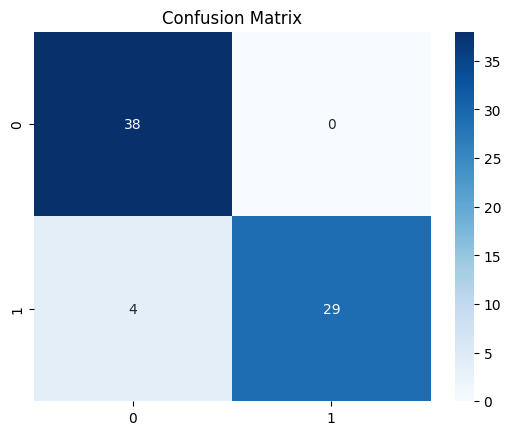

In [ ]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


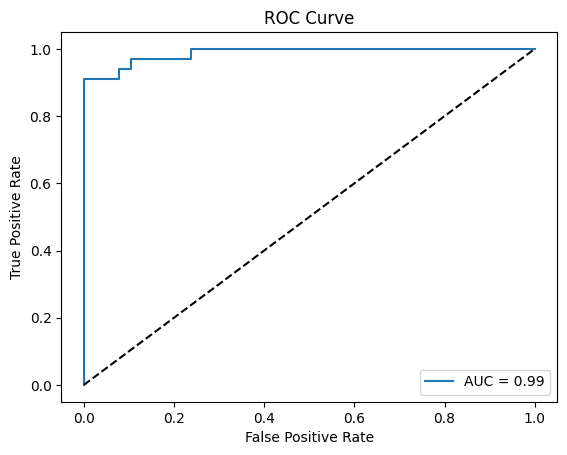

In [ ]:
# Probabilities for ROC
y_prob = clf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)


🔵 Logistic Regression Results:
Accuracy: 0.9436619718309859
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.88      0.94        33

    accuracy                           0.94        71
   macro avg       0.95      0.94      0.94        71
weighted avg       0.95      0.94      0.94        71



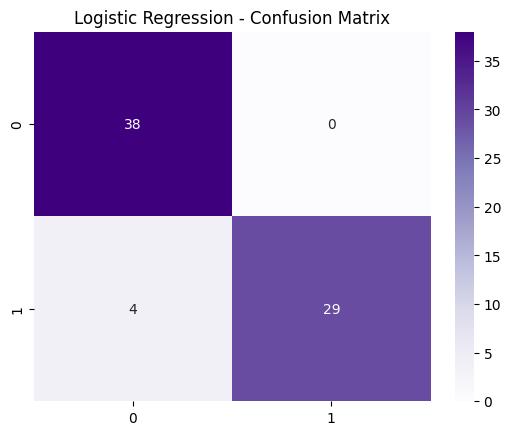

In [ ]:
# Accuracy and classification report
print("🔵 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Purples')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


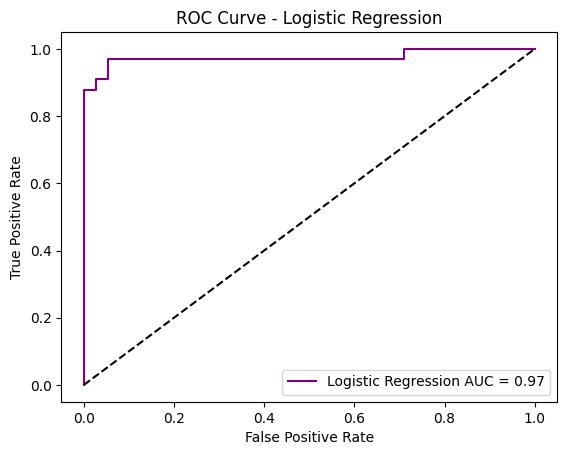

In [ ]:
# Predict probabilities for ROC
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression AUC = {auc_lr:.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [ ]:
# Predict probabilities for Random Forest (already done)
auc_rf = roc_auc_score(y_test, y_prob)

# Create summary
print("🔶 Model Comparison:")
print(f"Random Forest Accuracy:          {accuracy_score(y_test, y_pred):.2f}")
print(f"Random Forest ROC-AUC Score:     {auc_rf:.2f}")
print(f"Logistic Regression Accuracy:    {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Logistic Regression ROC-AUC:     {auc_lr:.2f}")


🔶 Model Comparison:
Random Forest Accuracy:          0.94
Random Forest ROC-AUC Score:     0.99
Logistic Regression Accuracy:    0.94
Logistic Regression ROC-AUC:     0.97


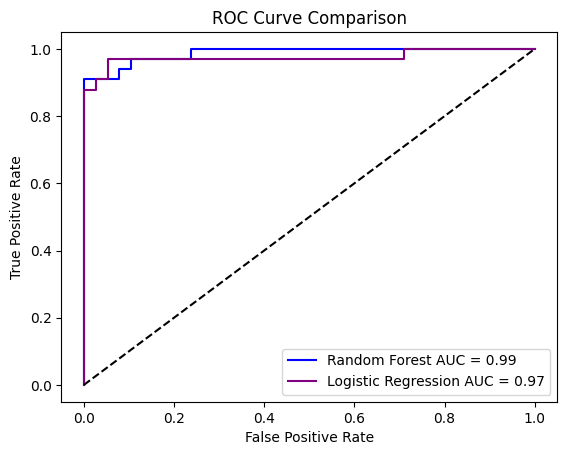

In [ ]:
# Plot both ROC curves together
plt.plot(fpr, tpr, label=f"Random Forest AUC = {auc_rf:.2f}", color='blue')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression AUC = {auc_lr:.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
